###### Data Description :
    
    The table data below represents weekly 2018 retail scan data for National retail volume and price.
    Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
    The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
    
    The Product Lookup codes (PLU’s) in the table are only for Hass avocados.
    
    Some relevant columns in the dataset :
    
    Date - the date of the observation
    AveragePrice - average price of a avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total volume - total numbe rof avocados sold
    4046 - total no.of avocados with PLU 4046 sold
    4225 - Total no.of avocados with PLU 4225 sold
    4770 - Total no.of avocados with PLU 4770 sold

The task is to predict the average price of the Avocados

###### Importing Libraries

In [110]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

###### Acquiring the Data :

In [2]:
data=pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


By looking at the dataset above, we can observe that many usefull feature columns like Total volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and Xlarge Bags are all continous data.

Also Our Target data AveragePrice is also continous data. We can straitly go head with regression model for this Data set.

The task is to predict the average price of a Avocado.

###### Analysing by describing the data:

In [3]:
#Lets Describe our data to see statistical results:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [4]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
data["type"].unique()

array(['conventional'], dtype=object)

In [6]:
data.columns.values

array(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046',
       '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


As we see above, there is no null values in the dataset. We can see it by plotting a heatmap to check for null values


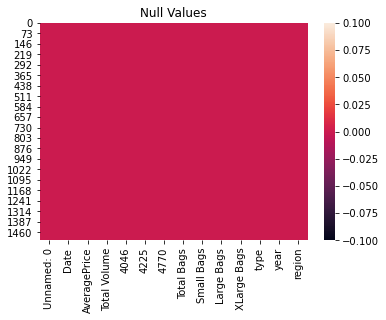

In [8]:
#Lets plot to visualize the null values
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

We can conclude that there is no null values in our dataset.

In [9]:
data.shape

(1517, 14)

In [10]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


###### Preprocessing of the data:

By seeing at the column "Unnamed: 0", it is just the index and contains no data. Hence we will drop this column.

In [11]:
data.drop("Unnamed: 0", axis=1,inplace=True)

In [12]:
#Lets confirm whether the column dropped or not

data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
data["Date"]=pd.to_datetime(data["Date"])
data["Month"]=data["Date"].map(lambda x:x.month)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [14]:
data.drop("Date",axis=1,inplace=True)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [15]:
Season = []

for i in data["Month"]:
    if i<=3:
        Season.append("Winter")
    elif i>=4 and i<=6:
        Season.append("Spring")
    elif i>=7 and i<=9:
        Season.append("Summer")
    elif i>=10 and i<=12:
        Season.append("Autumn")
data["Season"]=Season

In [16]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,Autumn
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,Autumn
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,Autumn
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,Spring
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,Autumn


In [17]:
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,Autumn
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,Summer
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,Winter
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,Summer
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte,9,Summer


In [18]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data["Season"]=LE.fit_transform(data["Season"])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,0


In [19]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
    DEPRECATED: Flexibly plot a univariate distribution of observations.
    
    .. warning::
       This function is deprecated and will be removed in a future version.
       Please adapt your code to use one of two new functions:
    
       - :func:`displot`, a figure-level function with a similar flexibility
         over the kind of plot to draw
       - :func:`histplot`, an axes-level function for plotting histograms,
         including with kernel density smoothing
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and

C:\Users\ak38\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

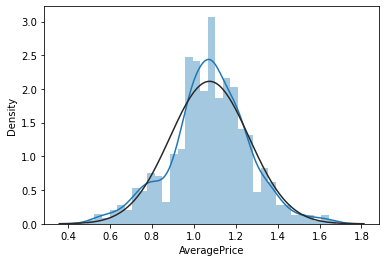

In [20]:
from scipy.stats import norm
sns.distplot(a=data.AveragePrice, fit=norm)


Lets look at the price with season

In [21]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

<AxesSubplot:xlabel='Season', ylabel='AveragePrice'>

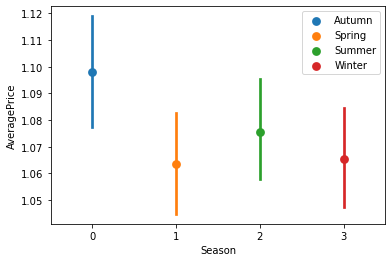

In [22]:
sns.pointplot(x="Season",y="AveragePrice", data=data, hue=Season)

<AxesSubplot:xlabel='Season', ylabel='AveragePrice'>

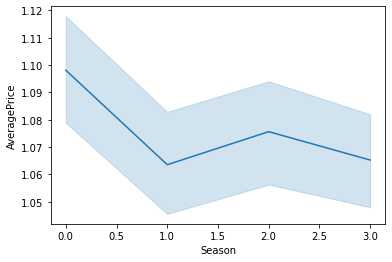

In [23]:
sns.lineplot(x="Season",y="AveragePrice", data=data)


From the above graph we can infer that the price is higher during Autumn Season. 

Price is lesser in Summer when compared with Autumn Season.
But During Spring and Winter Season, the price is lower compared to Summer.

Lets look at the region and the average price destribution

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

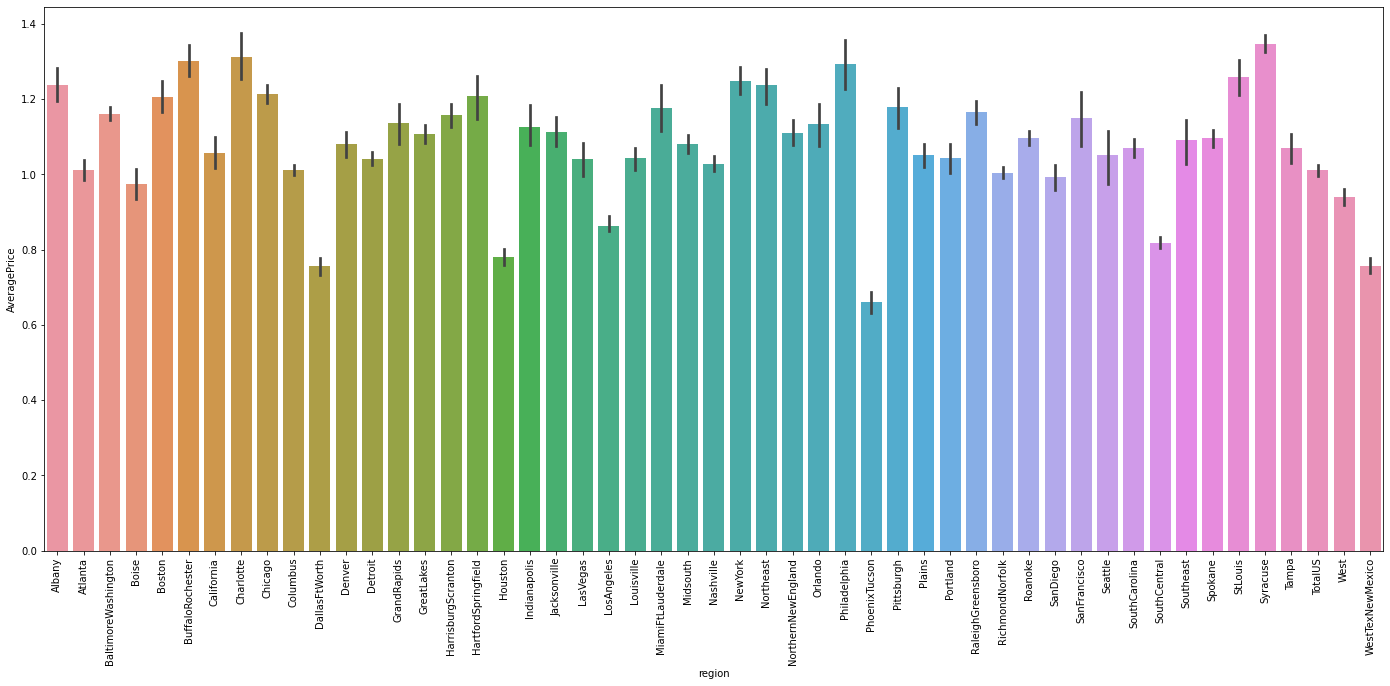

In [25]:
plt.figure(figsize=(24,10))
plt.xticks(rotation='vertical')
sns.barplot(x=data.region,y=data.AveragePrice,data=data, dodge=False,)

We can observe that in some of the places like Syracus,StLouis,Philadelphia,charlotte and BuffaloRochester, the prices are more compared to other regions

In [27]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

###### Checking Correlation :

Lets check for the correlation between the feature and the target set.

<AxesSubplot:>

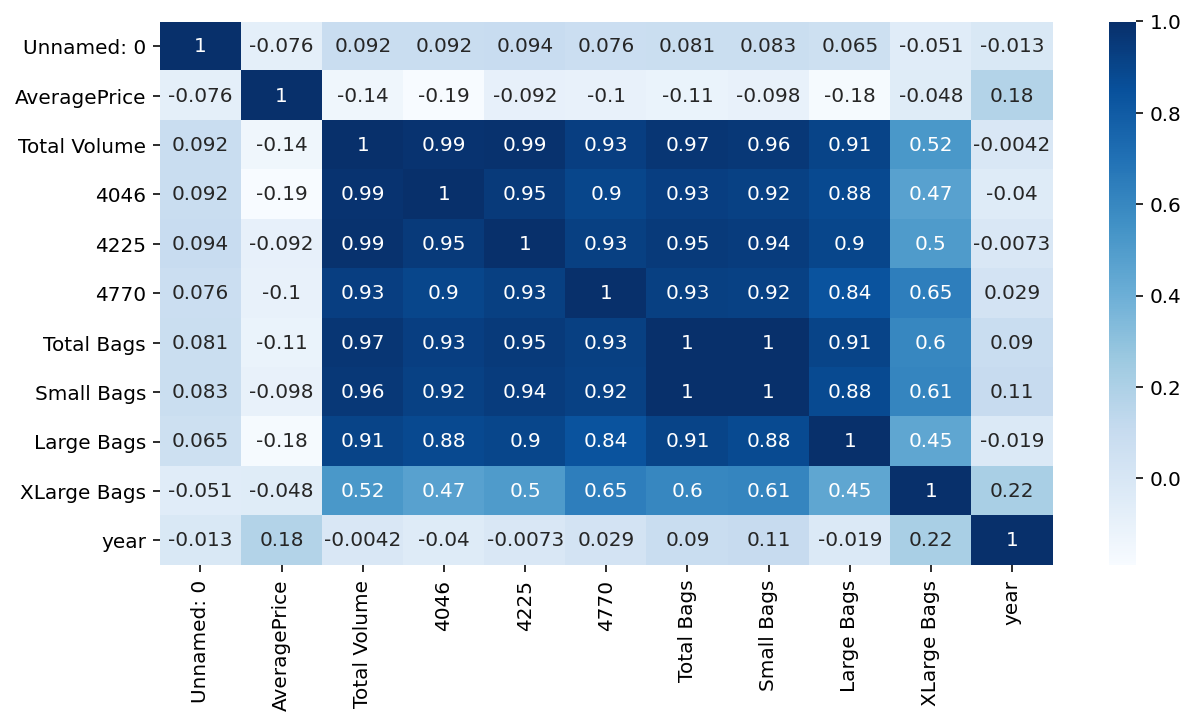

In [65]:
fig=plt.figure(figsize=(10,5))
df=data.corr(method='pearson')
sns.heatmap(df,annot=True,cmap="Blues")

In [67]:
corr_mat=data.corr()
corr_mat["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
Unnamed: 0     -0.075531
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

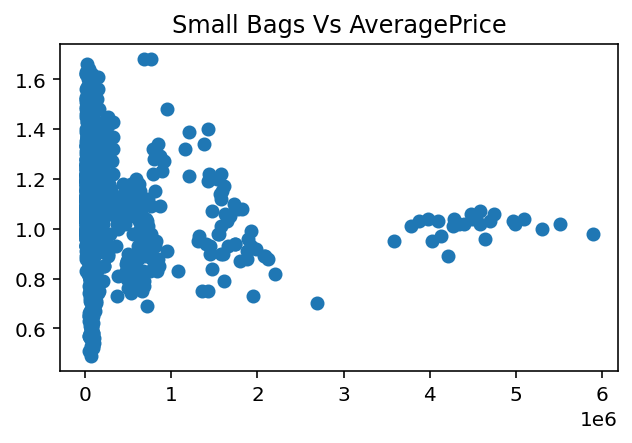

In [56]:
plt.figure(figsize=(5,3))
plt.scatter(x=data["Small Bags"],y=data["AveragePrice"])
plt.title("Small Bags Vs AveragePrice")
plt.show()

From the above plot we can see there are some outliers in the dataset

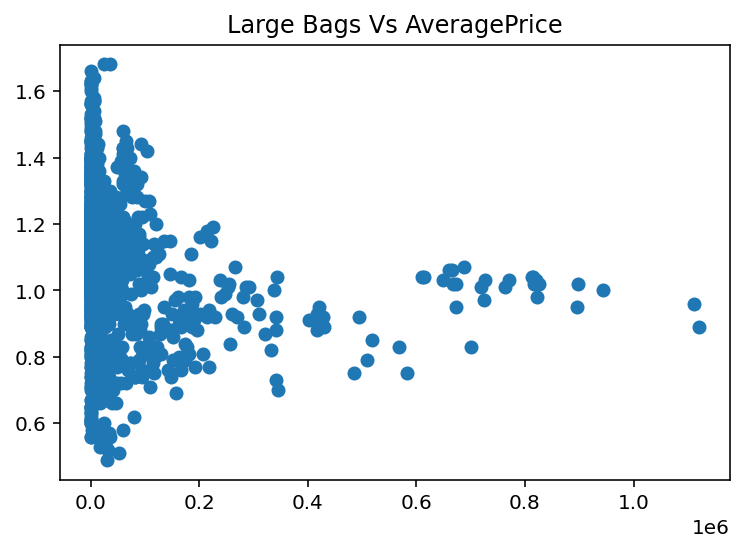

In [64]:
plt.scatter(x=data["Large Bags"],y=data["AveragePrice"])
plt.title("Large Bags Vs AveragePrice")
plt.show()

From the above plot we can see there are some outliers in the dataset

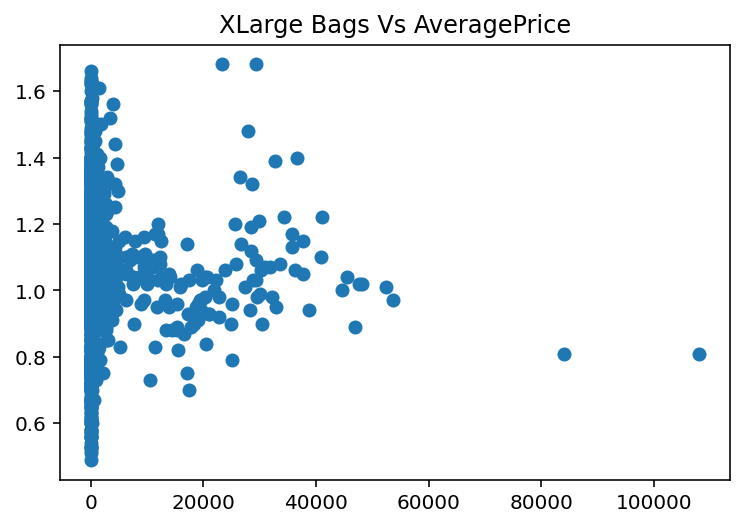

In [63]:
plt.scatter(x=data["XLarge Bags"],y=data["AveragePrice"])
plt.title("XLarge Bags Vs AveragePrice")
plt.show()

From the above plot we can see there are some outliers in the dataset

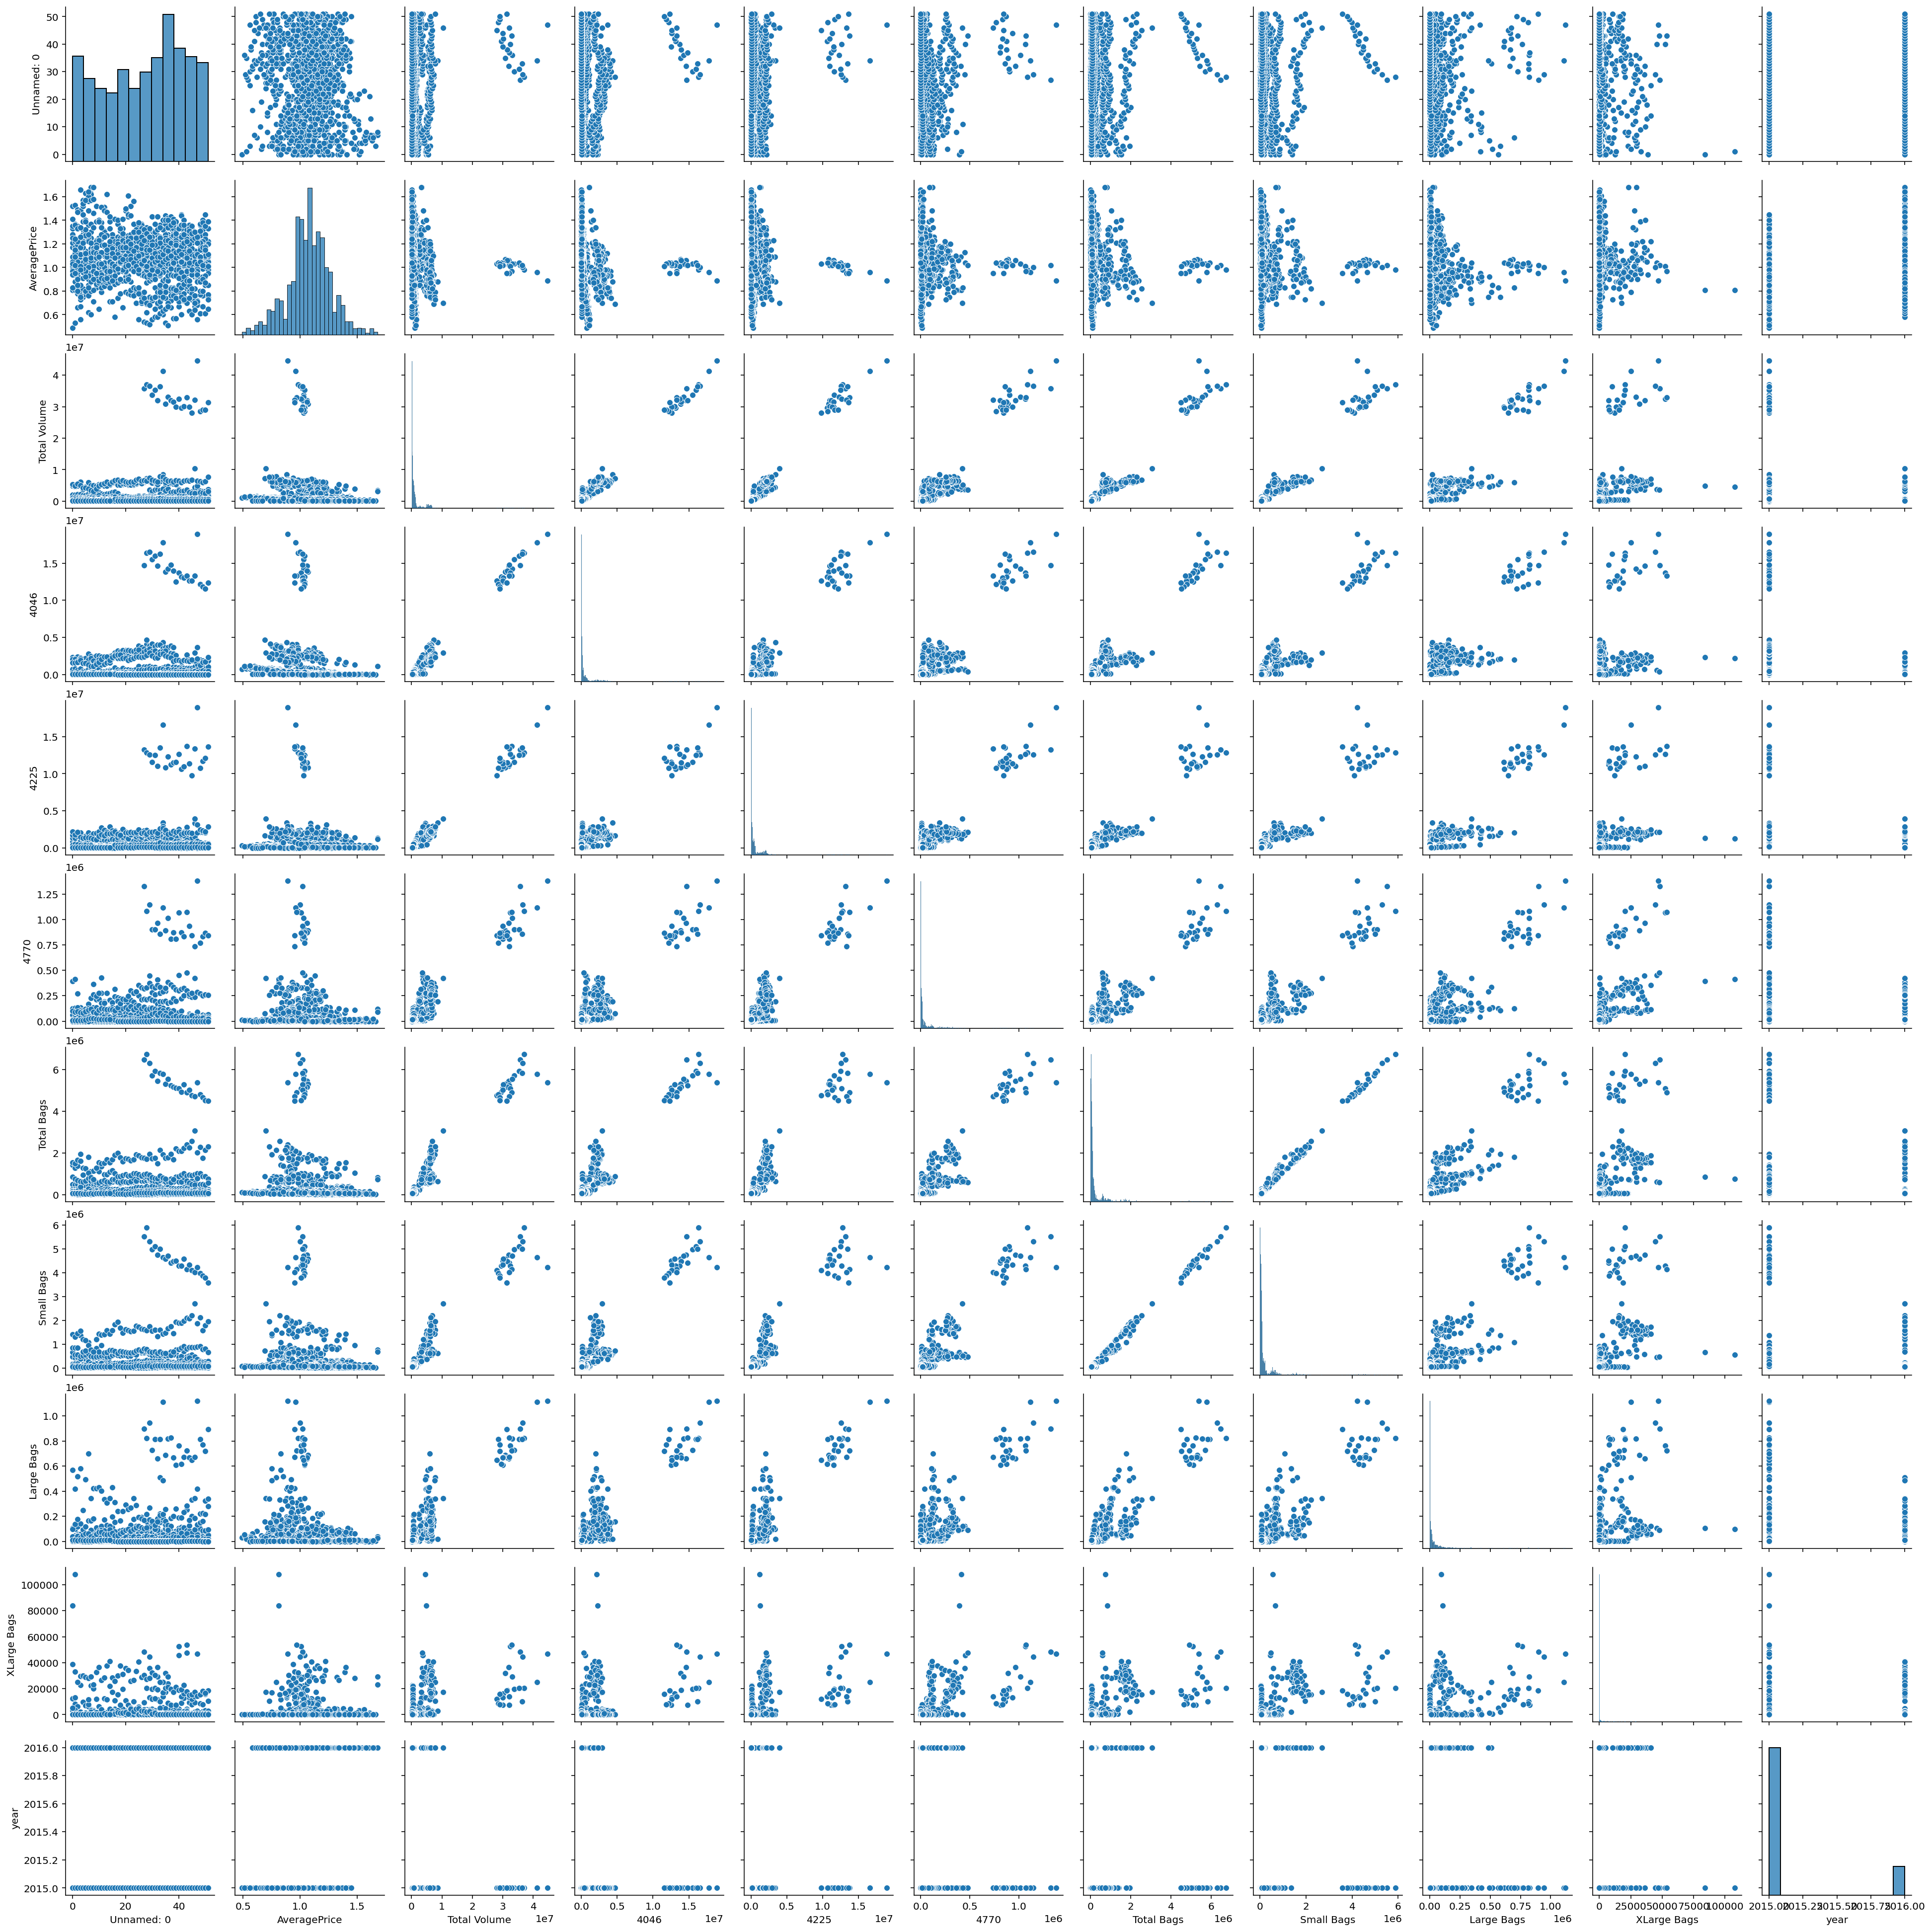

In [36]:
sns.pairplot(data)

In [22]:
data.shape

(1517, 14)

In [8]:
#Lets check the nominal Values
data["type"].unique()  

array(['conventional'], dtype=object)

As we see, there is only conventional type of Avocados. which can be excluded as there is no other type of Avocados.

In [6]:
data["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Lets Look at the Total Volume vs AveragePrice.
Total Volume Vs AveragePrice

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

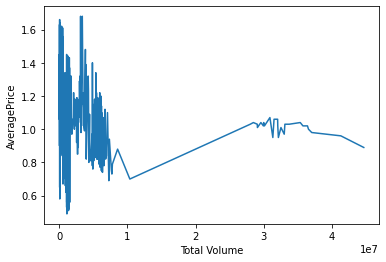

In [48]:
sns.lineplot(x="Total Volume",y="AveragePrice", data=data)


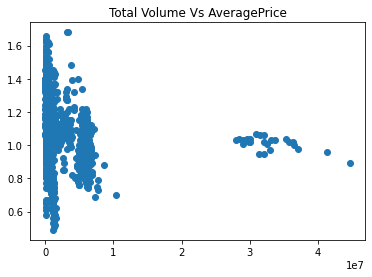

In [53]:
plt.scatter(x=data["Total Volume"],y=data["AveragePrice"])
plt.title("Total Volume Vs AveragePrice")
plt.show()

We can see that the frequency of price from 1 to 1.2 is more compared to other average price on the total volume

Average price versus PLUs :

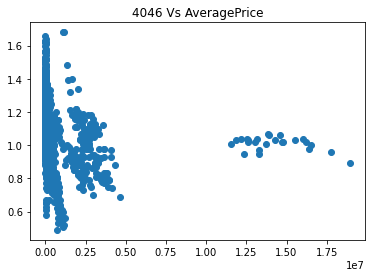

In [55]:
#AveragePrice Vs 4046

plt.scatter(x=data["4046"],y=data["AveragePrice"])
plt.title("4046 Vs AveragePrice")
plt.show()

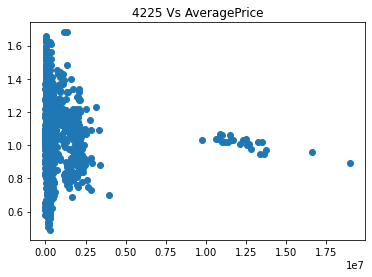

In [56]:
#AveragePrice Vs 4225

plt.scatter(x=data["4225"],y=data["AveragePrice"])
plt.title("4225 Vs AveragePrice")
plt.show()

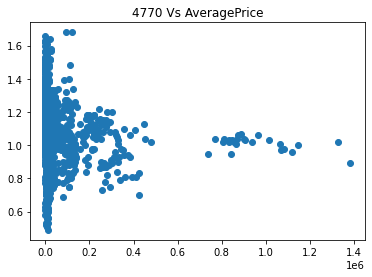

In [57]:
#AveragePrice Vs 4770

plt.scatter(x=data["4770"],y=data["AveragePrice"])
plt.title("4770 Vs AveragePrice")
plt.show()

We can see that the most of the price range lies between 1 to 1.2 in all the PLUs above.

Now lets drop the unwanted columns from the data

In [61]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,0


In [63]:
data.drop(columns=["type","year"], axis=1, inplace=True)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Season
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,6,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,0


###### Spliting the data : 
Lets Split the data into feature and target variable

In [68]:

data_x=data.drop(columns=["AveragePrice","region"])
y=data["AveragePrice"]
data_x.shape, y.shape

((1517, 10), (1517,))

###### Scaling : 

Now Lets scale the data to bring it to one standard Scaling format

In [69]:
data_x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Season
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,12,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,12,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,12,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,6,1
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,11,0


In [70]:
SS=StandardScaler()

x=SS.fit_transform(data_x)
x=pd.DataFrame(x,columns=data_x.columns)
x.head()


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,Season
0,-0.346966,-0.331490,-0.333053,-0.365608,-0.375994,-0.371055,-0.360044,-0.292727,1.624154,-1.343372
1,-0.349078,-0.331676,-0.338923,-0.365534,-0.374927,-0.369812,-0.360008,-0.292727,1.624154,-1.343372
2,-0.334785,-0.331614,-0.300348,-0.365010,-0.376722,-0.371922,-0.359960,-0.292727,1.624154,-1.343372
3,-0.343636,-0.331441,-0.322576,-0.365431,-0.379802,-0.375576,-0.359701,-0.292727,-0.104453,-0.451514
4,-0.349944,-0.331539,-0.339401,-0.365408,-0.379310,-0.375098,-0.359160,-0.292727,1.336053,-1.343372


In [82]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

Now the data is in Scaled Format

###### Best Random State :
Lets find the best random state where the accuracy is higher.

In [99]:
from sklearn.model_selection import train_test_split

maxAc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    dtc=DecisionTreeRegressor()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=dtc.score(x_train,y_train)
    if acc>maxAc:
        maxAc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAc, "on Random State ",maxRS)

Best Accuracy is  1.0 on Random State  1


We found the highest accuracy score 1.0 at the random state 1.

###### Train Test Split : 
    Lets split our data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [100]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1213, 10) (1213,) (304, 10) (304,)


###### Model Building :

In [114]:
lr=LinearRegression()
rfc=RandomForestRegressor()
svr=SVR()
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

model=[lr,rfc,svr,dtc,knn]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=r2_score(y_test,pred)
    print('Accuracy Score of',m,'is :',acc)
    print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((pred - y_test) ** 2))
    print("\n")

Accuracy Score of LinearRegression() is : 0.10673243587439618
Mean absolute error: 0.13
Residual sum of squares (MSE): 0.03


Accuracy Score of RandomForestRegressor() is : 0.8016255066249451
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01


Accuracy Score of SVR() is : 0.44462222144685737
Mean absolute error: 0.11
Residual sum of squares (MSE): 0.02


Accuracy Score of DecisionTreeRegressor() is : 0.5798615956355404
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01


Accuracy Score of KNeighborsRegressor() is : 0.5107334716856018
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.02




In [ ]:
We can see that the accuracy is higher in RandomForestRegressor Model. 

###### Cross Validation of the Model:

In [119]:
from sklearn.model_selection import cross_val_score


for m in model:
    cvs=cross_val_score(m,x,y,cv=3)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[ 0.15961741  0.0521229  -2.40988188]
accuracy of the model LinearRegression() is  -0.7327138572457487


[0.12856953 0.34005784 0.294252  ]
accuracy of the model RandomForestRegressor() is  0.2542931244195092


[-0.18345996  0.39467268  0.20393404]
accuracy of the model SVR() is  0.13838225531027892


[-1.3644797  -0.0588967  -0.02623579]
accuracy of the model DecisionTreeRegressor() is  -0.4832040634741541


[-0.02214334  0.00051146  0.10394945]
accuracy of the model KNeighborsRegressor() is  0.027439186328505876




When we use Cross Validation Score, we are seeing the higher accuracy at LinearRegression Model.

In [121]:
#The Coefficients : 
print('Coefficients :',lr.coef_)
print('Intercepts :',lr.intercept_)

Coefficients : [-0.01069552 -0.20347964  0.19419174 -0.00375888  0.03237342  0.05413097
 -0.08808554 -0.01303039  0.00993258 -0.00576224]
Intercepts : 1.074707768603037


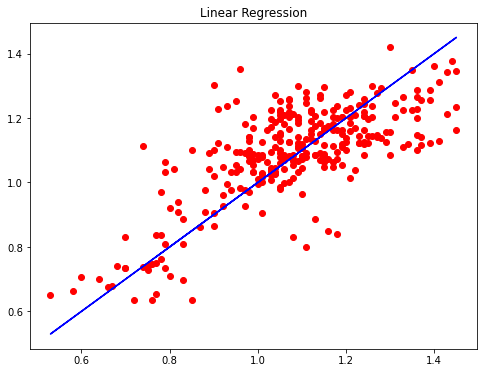

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred, color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

This is the best fit line including most of the data points which shows the good fit of our model.

###### Regularization :

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

params={"alpha":[0.0001,0.001,0.01,0.1,1,10], "random_state":list(range(0,10))}
ls=Lasso()
gcv=GridSearchCV(ls,params)
gcv.fit(x_train,y_train)

print(gcv.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [137]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

ls_Score=r2_score(y_test,pred_ls)
ls_Score

0.10774253736791539

In [138]:
cv_score=cross_val_score(ls, x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.42073202587871233

###### Ensemble Technique:

In [139]:
from sklearn.ensemble import RandomForestRegressor

params={'criterion':['mse','mae'], 'max_features':['auto','sqrt','log2']}
rfr=RandomForestRegressor()
gcv=GridSearchCV(rfr,params)
gcv.fit(x_train,y_train)

print(gcv.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [141]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)

rf_scr=r2_score(y_test,pred)

print('R2_score :',rf_scr*100)

rfs=cross_val_score(rf,x,y,cv=3)
rf_mean=rfs.mean()
print("cross Val Score :",rf_mean*100)

R2_score : 80.64623425815016
cross Val Score : 28.27598704479653


We are getting the Model accuracy as 80.64% which is good.

###### Saving the Model:

In [142]:
import joblib
file_name="Avocado.obj"
joblib.dump(rf,open(file_name,'wb'))

###### Conclusion:

In [143]:
a=np.array(y_test)
b=np.array(pred)
compare=pd.DataFrame({'Original':a,'Predicted':b},index=range(len(a)))
compare

,Original,Predicted
0,1.15,1.2280
1,1.00,1.0366
2,1.06,1.2088
3,1.27,1.2628
4,0.79,1.1415
...,...,...
299,1.44,1.3582
300,1.10,1.0609
301,1.07,1.1836
302,1.09,1.1218
